In [10]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# A C

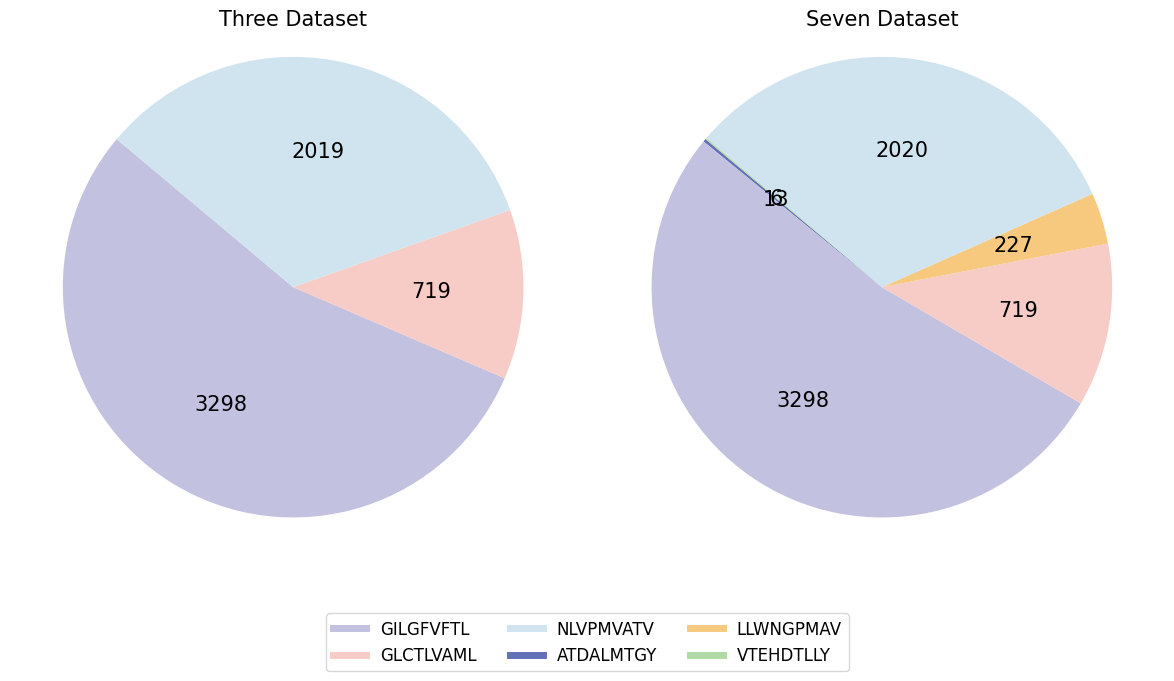

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

three = pd.read_csv("./Prediction/all/seen/three/all_pos.csv")
seven = pd.read_csv("./Prediction/all/seen/seven/all_pos.csv")

datasets = [three, seven]
counts = [df.groupby('Epitope')['CDR3B'].count().reset_index() for df in datasets]
for count in counts:
    count.columns = ['Epitope', 'CDR3B_count']
epitopes = pd.concat([three, seven])['Epitope'].unique()
color_map = dict(zip(epitopes, ['#C2C1E0','#F7CCC6','#D0E4EF','#6270B7','#F7C97E','#B0D9A5'])) 

def autopct_with_label_pading(pct, total):
    actual = int(round(pct/100.*total))
    return f'{actual}'
def plot_pie_chart(ax, data, title):
    total = data['CDR3B_count'].sum()
    wedges, texts, autotexts = ax.pie(
        data['CDR3B_count'],
        autopct=lambda pct: autopct_with_label_pading(pct, total),
        startangle=140,
        labels=None,
        colors=[color_map[epitope] for epitope in data['Epitope']]
    )
    ax.set_title(title, fontsize=15)
    for autotext in autotexts:
        autotext.set_fontsize(15)
        autotext.set_color('black')
    ax.axis('equal')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 15})

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
titles = ['Three Dataset', 'Seven Dataset']
for ax, data, title in zip(axs, counts, titles):
    plot_pie_chart(ax, data, title)

handles = [plt.Line2D([0], [0], color=color_map[epitope], lw=5) for epitope in color_map]
labels = list(color_map.keys())
legend = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fontsize=12, ncol=3)
plt.subplots_adjust(wspace=0.2, hspace=0.2, bottom=0.3)  
plt.tight_layout(rect=[0, 0.02, 1, 0.98])
plt.savefig('./All_results/fig/fig2/AC_TCRandEpitopeNumber.pdf', bbox_inches='tight')
plt.show()


# B

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
name=['1','2','3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc =pd.read_csv("./ERGO/result/Original/seen/three/"+i+"_healthlstm_mcpas_all_result.csv")
    ERGO_lstm_mc['epitope'] = ERGO_lstm_mc['epitope'] + '-ERGO_lstm_mc'
    ERGO_lstm_vdj =pd.read_csv("./ERGO/result/Original/seen/three/"+i+"_healthlstm_vdj_all_result.csv")
    ERGO_lstm_vdj['epitope'] = ERGO_lstm_vdj['epitope'] + '-ERGO_lstm_vdj'
    ERGO_AE_mc=pd.read_csv("./ERGO/result/Original/seen/three/"+i+"_healthae_mcpas_all_result.csv")
    ERGO_AE_mc['epitope'] = ERGO_AE_mc['epitope'] + '-ERGO_AE_mc'
    ERGO_AE_vdj=pd.read_csv("./ERGO/result/Original/seen/three/"+i+"_healthae_vdj_all_result.csv")
    ERGO_AE_vdj['epitope'] = ERGO_AE_vdj['epitope'] + '-ERGO_AE_vdj'
    NetTCR=pd.read_csv("./NetTCR/result/Original/seen/three/"+i+"_healthall_result.csv")
    NetTCR['epitope'] = NetTCR['epitope'] + '-NetTCR'
    DLpTCR_CNN=pd.read_csv("./DLpTCR/result/Original/seen/three/"+i+"_health_CNN_all_result.csv")
    DLpTCR_CNN['epitope'] = DLpTCR_CNN['epitope'] + '-DLpTCR_CNN'
    DLpTCR_FULL=pd.read_csv("./DLpTCR/result/Original/seen/three/"+i+"_health_FULL_all_result.csv")
    DLpTCR_FULL['epitope'] = DLpTCR_FULL['epitope'] + '-DLpTCR_FULL'
    DLpTCR_RESNET=pd.read_csv("./DLpTCR/result/Original/seen/three/"+i+"_health_RESNET_all_result.csv")
    DLpTCR_RESNET['epitope'] = DLpTCR_RESNET['epitope'] + '-DLpTCR_RESNET'
    AttnTAP_mc=pd.read_csv("./AttnTAP/result/Original/seen/three/"+i+"_health_mcpas_all_result.csv")
    AttnTAP_mc['epitope'] = AttnTAP_mc['epitope'] + '-AttnTAP_mc'
    AttnTAP_vdj=pd.read_csv("./AttnTAP/result/Original/seen/three/"+i+"_health_vdjdb_all_result.csv")
    AttnTAP_vdj['epitope'] = AttnTAP_vdj['epitope'] + '-AttnTAP_vdj'
    ATM_TCR=pd.read_csv("./ATM_TCR/result/Original/seen/three/"+i+"_healthall_result.csv")
    ATM_TCR['epitope'] = ATM_TCR['epitope'] + '-ATM_TCR'
    TEINet_large=pd.read_csv("./TEINet/result/Original/seen/three/large_"+i+"_healthall_result.csv")
    TEINet_large['epitope'] = TEINet_large['epitope'] + '-TEINet_large'
    TEINet_teinet=pd.read_csv("./TEINet/result/Original/seen/three/teinet_"+i+"_healthall_result.csv")
    TEINet_teinet['epitope'] = TEINet_teinet['epitope'] + '-TEINet_teinet'
    epiTCR=pd.read_csv("./epiTCR/result/Original/no_CF/seen/three/"+i+"_healthall_result.csv")
    epiTCR['epitope'] = epiTCR['epitope'] + '-epiTCR'
    SETE=pd.read_csv("./SETE/result/Original/seen/three/"+i+"_healthall_result.csv")
    SETE['epitope']=SETE['epitope'] + '-SETE'
    TEIM=pd.read_csv("./TEIM/result/Original/seen/three/"+i+"_healthall_result.csv")
    TEIM['epitope'] = TEIM['epitope'] + '-TEIM'
    TPBTE_mc=pd.read_csv("./TPBTE/result/Original/seen/three/McPAS_"+i+"_healthall_result.csv")
    TPBTE_mc['epitope'] = TPBTE_mc['epitope'] + '-TPBTE_mc'
    TPBTE_vdj=pd.read_csv("./TPBTE/result/Original/seen/three/VDJdb_"+i+"_healthall_result.csv")
    TPBTE_vdj['epitope'] = TPBTE_vdj['epitope'] + '-TPBTE_vdj'
    TCRGP=pd.read_csv("./TCRGP/result/Original/seen/three/"+i+"_healthall_result.csv")
    TCRGP['epitope'] = TCRGP['epitope'] + '-TCRGP'
    ImRex=pd.read_csv("./ImRex/result/Original/seen/three/"+i+"_healthall_result.csv")
    ImRex['epitope'] = ImRex['epitope'] + '-ImRex'
    tcr_bert=pd.read_csv("./tcr_bert/result/Original/seen/three/"+i+"_healthall_result.csv")
    tcr_bert['epitope'] = tcr_bert['epitope'] + '-TCR_BERT'
    merged = pd.DataFrame()
    dataframe_names = ['ERGO_lstm_mc','ERGO_lstm_vdj','ERGO_AE_mc','ERGO_AE_vdj','NetTCR','DLpTCR_CNN','DLpTCR_FULL', 
                       'DLpTCR_RESNET','AttnTAP_mc','AttnTAP_vdj', 'ATM_TCR', 
                       'TEINet_large','TEINet_teinet' ,'epiTCR','SETE','TEIM','TPBTE_mc','TPBTE_vdj','TCRGP','ImRex','tcr_bert']
    for df_name in dataframe_names:
        df = globals()[df_name]
        merged = pd.concat([merged, df])
    merged_dict[f'merged{i}'] = merged
merged1, merged2, merged3= (merged_dict[f'merged{i}'] for i in name) 
merged1.set_index('epitope', inplace=True)
merged2.set_index('epitope', inplace=True)
merged3.set_index('epitope', inplace=True)
df_mean = (merged1 + merged2 + merged3) / 3
new_column_names = {'roc_auc': 'AUROC','prc_auc': 'AUPRC','accuracy': 'Accuracy','precision': 'Precision','recall': 'Recall','specificity': 'Specificity','mcc': 'MCC','f1': 'F1'}
df_mean.rename(columns=new_column_names, inplace=True)
df_std = pd.concat([merged1, merged2, merged3]).groupby(level=0).std()
new_column_names = {'roc_auc': 'AUROC_std','prc_auc': 'AUPRC_std','accuracy': 'Accuracy_std','precision': 'Precision_std','recall': 'Recall_std','specificity': 'Specificity_std','mcc': 'MCC_std','f1': 'F1_std'}
df_std.rename(columns=new_column_names, inplace=True)
df_mean = pd.concat([df_mean, df_std], axis=1)
all_values = df_mean.sort_values(by='AUPRC')
all_values = all_values[all_values.index.str.contains('all_values')]
all_values.index = all_values.index.str.replace('all_values-', '')
all_values.index = all_values.index.str.replace('_', '-')
new_column_order = [
    'AUROC', 'AUROC_std',
    'AUPRC', 'AUPRC_std',
    'Accuracy', 'Accuracy_std',
    'Precision', 'Precision_std',
    'Recall', 'Recall_std',
    'Specificity', 'Specificity_std',
    'MCC', 'MCC_std',
    'F1', 'F1_std'
]

all_values = all_values[new_column_order]
all_values = all_values.round(4)
all_values.rename_axis('models', inplace=True)
all_values.to_csv("./All_results/data/data1/Original_Healthy_Three_Epitope.csv")

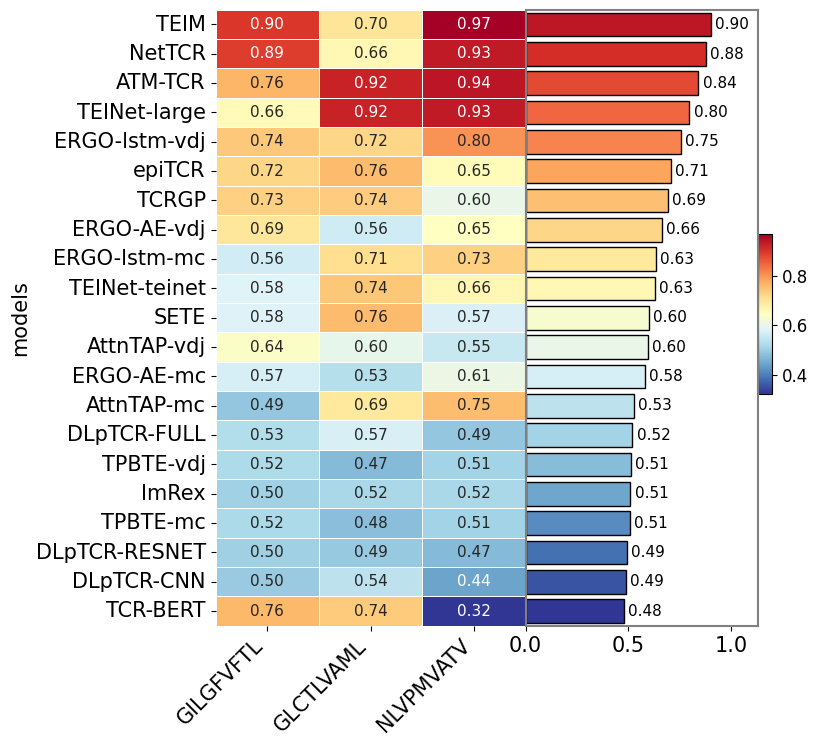

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec

epi_df = df_mean[~df_mean.index.str.contains('all_values')]
epi_df = epi_df[['AUPRC']]
epi_df['epi'] = epi_df.index
epi_df['epi'] = epi_df['epi'].astype(str)
try:
    new_columns = epi_df['epi'].str.split('-', n=1, expand=True)
    epi_df['epitope'] = new_columns[0]
    epi_df['models'] = new_columns[1]
except Exception as e:
    print("Error:", e)

epi_df = epi_df[['models', 'epitope', 'AUPRC']]
epi_df.reset_index(drop=True, inplace=True)
pivot_df = epi_df.pivot_table(index='models', columns='epitope', values='AUPRC', aggfunc='mean').reset_index()
pivot_df.fillna(0, inplace=True)  # 填充缺失值
models_list = pivot_df['models'].tolist()
final_data = {
    'models': models_list,
    'GILGFVFTL': pivot_df['GILGFVFTL'].tolist(),
    'GLCTLVAML': pivot_df['GLCTLVAML'].tolist(),
    'NLVPMVATV': pivot_df['NLVPMVATV'].tolist()
}

final_df = pd.DataFrame(final_data)
final_df['models'] = final_df['models'].str.replace('_', '-')
final_df.index = final_df['models']
final_df = final_df[['GILGFVFTL', 'GLCTLVAML', 'NLVPMVATV']]
all_values = all_values.sort_values(by='AUPRC', ascending=False)
epi_df = final_df.reindex(all_values.index)
all_values = all_values.sort_values(by='AUPRC')

colors = sns.color_palette("RdYlBu", n_colors=256)[::-1]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
fig = plt.figure(figsize=(7, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1.5], wspace=0.0) 
ax1 = fig.add_subplot(gs[0])
sns.heatmap(epi_df, annot=True, fmt=".2f", linewidths=.5, cmap=cmap, cbar=False, ax=ax1, annot_kws={'size': 11})
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
cbar_ax = fig.add_axes([0.9, 0.4, 0.02, 0.2])
cbar = fig.colorbar(ax1.collections[0], cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
ax2 = fig.add_subplot(gs[1])
colors = [cmap(i / len(all_values)) for i in range(len(all_values))]
bars = ax2.barh(all_values.index, all_values['AUPRC'], color=colors, edgecolor='black')
for bar in bars:
    ax2.annotate(f'{bar.get_width():.2f}', 
                 (bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2), 
                 ha='left', va='center', fontsize=11)
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['left'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
for spine in ax2.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1.5)
ax2.set_ylim(-0.5, len(all_values) - 0.5)
ax2.set_xlim(0, 1.13)
ax2.get_yaxis().set_visible(False)
path = "./All_results/fig/fig2/"
plt.savefig(path + 'B_heatmap_and_barchart_prediction_three.pdf', bbox_inches='tight')
plt.show()


# D

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
name=['1','2','3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc =pd.read_csv("./ERGO/result/Original/seen/seven/"+i+"_healthlstm_mcpas_all_result.csv")
    ERGO_lstm_mc['epitope'] = ERGO_lstm_mc['epitope'] + '-ERGO_lstm_mc'
    ERGO_lstm_vdj =pd.read_csv("./ERGO/result/Original/seen/seven/"+i+"_healthlstm_vdj_all_result.csv")
    ERGO_lstm_vdj['epitope'] = ERGO_lstm_vdj['epitope'] + '-ERGO_lstm_vdj'
    ERGO_AE_mc=pd.read_csv("./ERGO/result/Original/seen/seven/"+i+"_healthae_mcpas_all_result.csv")
    ERGO_AE_mc['epitope'] = ERGO_AE_mc['epitope'] + '-ERGO_AE_mc'
    ERGO_AE_vdj=pd.read_csv("./ERGO/result/Original/seen/seven/"+i+"_healthae_vdj_all_result.csv")
    ERGO_AE_vdj['epitope'] = ERGO_AE_vdj['epitope'] + '-ERGO_AE_vdj'
    DLpTCR_CNN=pd.read_csv("./DLpTCR/result/Original/seen/seven/"+i+"_health_CNN_all_result.csv")
    DLpTCR_CNN['epitope'] = DLpTCR_CNN['epitope'] + '-DLpTCR_CNN'
    DLpTCR_FULL=pd.read_csv("./DLpTCR/result/Original/seen/seven/"+i+"_health_FULL_all_result.csv")
    DLpTCR_FULL['epitope'] = DLpTCR_FULL['epitope'] + '-DLpTCR_FULL'
    DLpTCR_RESNET=pd.read_csv("./DLpTCR/result/Original/seen/seven/"+i+"_health_RESNET_all_result.csv")
    DLpTCR_RESNET['epitope'] = DLpTCR_RESNET['epitope'] + '-DLpTCR_RESNET'
    AttnTAP_mc=pd.read_csv("./AttnTAP/result/Original/seen/seven/"+i+"_health_mcpas_all_result.csv")
    AttnTAP_mc['epitope'] = AttnTAP_mc['epitope'] + '-AttnTAP_mc'
    AttnTAP_vdj=pd.read_csv("./AttnTAP/result/Original/seen/seven/"+i+"_health_vdjdb_all_result.csv")
    AttnTAP_vdj['epitope'] = AttnTAP_vdj['epitope'] + '-AttnTAP_vdj'
    ATM_TCR=pd.read_csv("./ATM_TCR/result/Original/seen/seven/"+i+"_healthall_result.csv")
    ATM_TCR['epitope'] = ATM_TCR['epitope'] + '-ATM_TCR'
    TEINet_large=pd.read_csv("./TEINet/result/Original/seen/seven/large_"+i+"_healthall_result.csv")
    TEINet_large['epitope'] = TEINet_large['epitope'] + '-TEINet_large'
    TEINet_teinet=pd.read_csv("./TEINet/result/Original/seen/seven/teinet_"+i+"_healthall_result.csv")
    TEINet_teinet['epitope'] = TEINet_teinet['epitope'] + '-TEINet_teinet'
    epiTCR=pd.read_csv("./epiTCR/result/Original/no_CF/seen/seven/"+i+"_healthall_result.csv")
    epiTCR['epitope'] = epiTCR['epitope'] + '-epiTCR'
    TEIM=pd.read_csv("./TEIM/result/Original/seen/seven/"+i+"_healthall_result.csv")
    TEIM['epitope'] = TEIM['epitope'] + '-TEIM'
    ImRex=pd.read_csv("./ImRex/result/Original/seen/seven/"+i+"_healthall_result.csv")
    ImRex['epitope'] = ImRex['epitope'] + '-ImRex'
    tcr_bert=pd.read_csv("./tcr_bert/result/Original/seen/seven/"+i+"_healthall_result.csv")
    tcr_bert['epitope'] = tcr_bert['epitope'] + '-TCR_BERT'
    merged = pd.DataFrame()
    dataframe_names = ['ERGO_lstm_mc','ERGO_lstm_vdj','ERGO_AE_mc','ERGO_AE_vdj','DLpTCR_CNN','DLpTCR_FULL', 
                       'DLpTCR_RESNET','AttnTAP_mc','AttnTAP_vdj', 'ATM_TCR', 
                       'TEINet_large','TEINet_teinet' ,'epiTCR','TEIM','ImRex','tcr_bert']
    for df_name in dataframe_names:
        df = globals()[df_name]
        merged = pd.concat([merged, df])
    merged_dict[f'merged{i}'] = merged
merged1, merged2, merged3= (merged_dict[f'merged{i}'] for i in name) 
merged1.set_index('epitope', inplace=True)
merged2.set_index('epitope', inplace=True)
merged3.set_index('epitope', inplace=True)
df_mean = (merged1 + merged2 + merged3) / 3
new_column_names = {'roc_auc': 'AUROC','prc_auc': 'AUPRC','accuracy': 'Accuracy','precision': 'Precision','recall': 'Recall','specificity': 'Specificity','mcc': 'MCC','f1': 'F1'}
df_mean.rename(columns=new_column_names, inplace=True)
df_std = pd.concat([merged1, merged2, merged3]).groupby(level=0).std()
new_column_names = {'roc_auc': 'AUROC_std','prc_auc': 'AUPRC_std','accuracy': 'Accuracy_std','precision': 'Precision_std','recall': 'Recall_std','specificity': 'Specificity_std','mcc': 'MCC_std','f1': 'F1_std'}
df_std.rename(columns=new_column_names, inplace=True)
df_mean = pd.concat([df_mean, df_std], axis=1)
all_values = df_mean.sort_values(by='AUPRC')
all_values = all_values[all_values.index.str.contains('all_values')]
all_values.index = all_values.index.str.replace('all_values-', '')
all_values.index = all_values.index.str.replace('_', '-')
new_column_order = [
    'AUROC', 'AUROC_std',
    'AUPRC', 'AUPRC_std',
    'Accuracy', 'Accuracy_std',
    'Precision', 'Precision_std',
    'Recall', 'Recall_std',
    'Specificity', 'Specificity_std',
    'MCC', 'MCC_std',
    'F1', 'F1_std'
]

all_values = all_values[new_column_order]
all_values = all_values.round(4)
all_values.rename_axis('models', inplace=True)
all_values.to_csv("./All_results/data/data1/Original_Healthy_six_Epitope.csv")

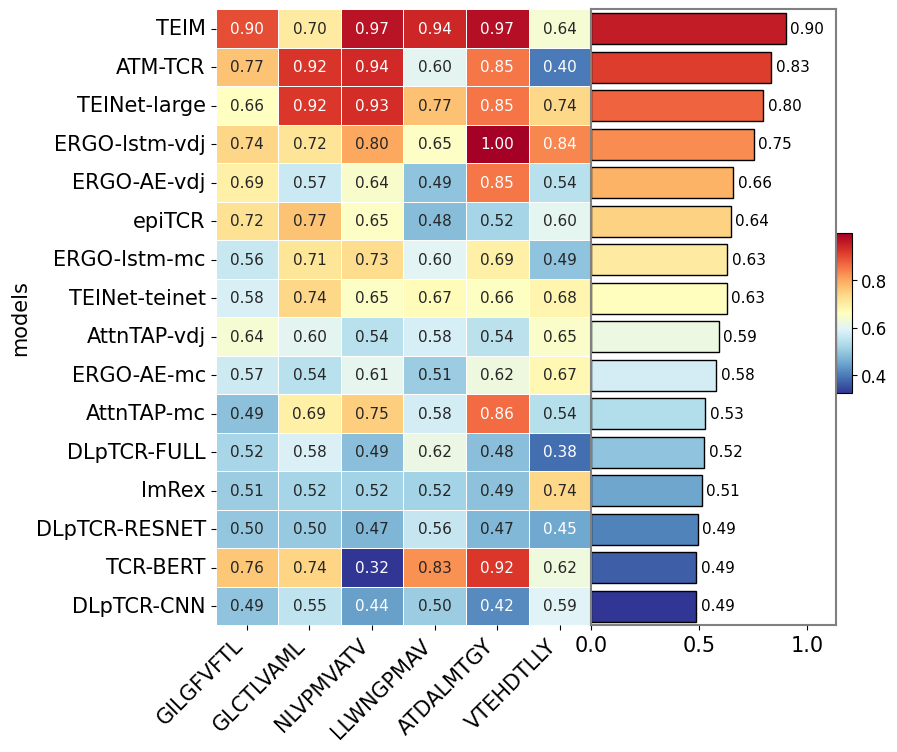

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
colors = sns.color_palette("RdYlBu", n_colors=256)[::-1]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

epi_df = df_mean[~df_mean.index.str.contains('all_values')]
epi_df = epi_df[['AUPRC']]
epi_df['epi'] = epi_df.index
epi_df['epi'] = epi_df['epi'].astype(str)
try:
    new_columns = epi_df['epi'].str.split('-', n=1, expand=True)
    epi_df['epitope'] = new_columns[0]
    epi_df['models'] = new_columns[1]
except Exception as e:
    print("Error:", e)

epi_df = epi_df[['models', 'epitope', 'AUPRC']]
epi_df.reset_index(drop=True, inplace=True)
pivot_df = epi_df.pivot_table(index='models', columns='epitope', values='AUPRC', aggfunc='mean').reset_index()
pivot_df.fillna(0, inplace=True)  # 填充缺失值
models_list = pivot_df['models'].tolist()
final_data = {
    'models': models_list,
    'GILGFVFTL': pivot_df['GILGFVFTL'].tolist(),
    'GLCTLVAML': pivot_df['GLCTLVAML'].tolist(),
    'NLVPMVATV': pivot_df['NLVPMVATV'].tolist(),
    'LLWNGPMAV': pivot_df['LLWNGPMAV'].tolist(),
    'ATDALMTGY': pivot_df['ATDALMTGY'].tolist(),
    'VTEHDTLLY': pivot_df['VTEHDTLLY'].tolist()}

final_df = pd.DataFrame(final_data)
final_df['models'] = final_df['models'].str.replace('_', '-')
final_df.index = final_df['models']
final_df = final_df[['GILGFVFTL', 'GLCTLVAML', 'NLVPMVATV','LLWNGPMAV','ATDALMTGY','VTEHDTLLY']]
all_values = all_values.sort_values(by='AUPRC', ascending=False)
epi_df = final_df.reindex(all_values.index)
all_values = all_values.sort_values(by='AUPRC')

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1.3], wspace=0.0) 
ax1 = fig.add_subplot(gs[0])
sns.heatmap(epi_df, annot=True, fmt=".2f", linewidths=.5, cmap=cmap, cbar=False, ax=ax1, annot_kws={'size': 11})
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
cbar_ax = fig.add_axes([0.9, 0.4, 0.02, 0.2])
cbar = fig.colorbar(ax1.collections[0], cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
ax2 = fig.add_subplot(gs[1])
colors = [cmap(i / len(all_values)) for i in range(len(all_values))]
bars = ax2.barh(all_values.index, all_values['AUPRC'], color=colors, edgecolor='black')
for bar in bars:
    ax2.annotate(f'{bar.get_width():.2f}', 
                 (bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2), 
                 ha='left', va='center', fontsize=11)
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['left'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
for spine in ax2.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1.5)
ax2.set_ylim(-0.5, len(all_values) - 0.5)
ax2.set_xlim(0, 1.13)
ax2.get_yaxis().set_visible(False)
path = "./All_results/fig/fig2/"
plt.savefig(path + 'D_heatmap_and_barchart_prediction_six.pdf', bbox_inches='tight')
plt.show()


# E

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

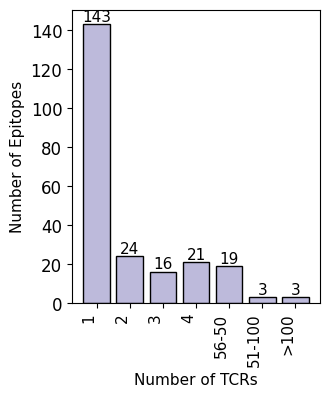

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import os

all_data=pd.read_csv("./Prediction/all/unseen/all_pos.csv")
epitope_counts  = all_data.groupby('Epitope')['CDR3B'].nunique()
epitope_counts_df = epitope_counts.reset_index()
bins = [1, 2,3,4,5, 50, 100, float('inf')]
labels = ['1','2','3','4','5' '6-50', '51-100', '>100']
epitope_counts_df['Interval'] = pd.cut(epitope_counts_df['CDR3B'], bins=bins, labels=labels, right=False)
interval_counts = epitope_counts_df['Interval'].value_counts().sort_index()
plt.figure(figsize=(3.2, 3.8))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 12})
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12  
plt.rcParams['ytick.labelsize'] = 12  
plt.rcParams['legend.fontsize'] = 12 
bars = plt.bar(interval_counts.index, interval_counts.values, color='#BDBADB', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height),
             ha='center', va='bottom', fontsize=11)
plt.xlabel('Number of TCRs',fontsize=11)
plt.ylabel('Number of Epitopes', fontsize=11)
plt.xticks(fontsize=11, rotation=90, ha='right', va='top')
path = "./All_results/fig/fig2/"
plt.savefig(path + 'E_unseen_data_information.pdf', bbox_inches='tight', edgecolor='black')
plt.show()

# F

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
name=['1','2','3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc =pd.read_csv("./ERGO/result/Original/unseen/lstm_mcpas"+i+"_health_all_result.csv")
    ERGO_lstm_mc['epitope'] = ERGO_lstm_mc['epitope'] + '-ERGO_lstm_mc'
    ERGO_lstm_vdj =pd.read_csv("./ERGO/result/Original/unseen/lstm_vdj"+i+"_health_all_result.csv")
    ERGO_lstm_vdj['epitope'] = ERGO_lstm_vdj['epitope'] + '-ERGO_lstm_vdj'
    ERGO_AE_mc=pd.read_csv("./ERGO/result/Original/unseen/ae_mcpas"+i+"_health_all_result.csv")
    ERGO_AE_mc['epitope'] = ERGO_AE_mc['epitope'] + '-ERGO_AE_mc'
    ERGO_AE_vdj=pd.read_csv("./ERGO/result/Original/unseen/ae_vdj"+i+"_health_all_result.csv")
    ERGO_AE_vdj['epitope'] = ERGO_AE_vdj['epitope'] + '-ERGO_AE_vdj'
    NetTCR=pd.read_csv("./NetTCR/result/Original/unseen/"+i+"_healthall_result.csv")
    NetTCR['epitope'] = NetTCR['epitope'] + '-NetTCR'
    DLpTCR_CNN=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_health_CNN_all_result.csv")
    DLpTCR_CNN['epitope'] = DLpTCR_CNN['epitope'] + '-DLpTCR_CNN'
    DLpTCR_FULL=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_health_FULL_all_result.csv")
    DLpTCR_FULL['epitope'] = DLpTCR_FULL['epitope'] + '-DLpTCR_FULL'
    DLpTCR_RESNET=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_health_RESNET_all_result.csv")
    DLpTCR_RESNET['epitope'] = DLpTCR_RESNET['epitope'] + '-DLpTCR_RESNET'
    AttnTAP_mc=pd.read_csv("./AttnTAP/result/Original/unseen/"+i+"_health_mcpas_all_result.csv")
    AttnTAP_mc['epitope'] = AttnTAP_mc['epitope'] + '-AttnTAP_mc'
    AttnTAP_vdj=pd.read_csv("./AttnTAP/result/Original/unseen/"+i+"_health_vdjdb_all_result.csv")
    AttnTAP_vdj['epitope'] = AttnTAP_vdj['epitope'] + '-AttnTAP_vdj'
    ATM_TCR=pd.read_csv("./ATM_TCR/result/Original/unseen/"+i+"_healthall_result.csv")
    ATM_TCR['epitope'] = ATM_TCR['epitope'] + '-ATM_TCR'
    TEINet_large=pd.read_csv("./TEINet/result/Original/unseen/large_"+i+"_healthall_result.csv")
    TEINet_large['epitope'] = TEINet_large['epitope'] + '-TEINet_large'
    TEINet_teinet=pd.read_csv("./TEINet/result/Original/unseen/teinet_"+i+"_healthall_result.csv")
    TEINet_teinet['epitope'] = TEINet_teinet['epitope'] + '-TEINet_teinet'
    epiTCR=pd.read_csv("./epiTCR/result/Original/no_CF/unseen/"+i+"_healthall_result.csv")
    epiTCR['epitope'] = epiTCR['epitope'] + '-epiTCR'
    TEIM=pd.read_csv("./TEIM/result/Original/unseen/"+i+"_healthall_result.csv")
    TEIM['epitope'] = TEIM['epitope'] + '-TEIM'
    TPBTE_mc=pd.read_csv("./TPBTE/result/Original/unseen/McPAS_"+i+"_healthall_result.csv")
    TPBTE_mc['epitope'] = TPBTE_mc['epitope'] + '-TPBTE_mc'
    TPBTE_vdj=pd.read_csv("./TPBTE/result/Original/unseen/VDJdb_"+i+"_healthall_result.csv")
    TPBTE_vdj['epitope'] = TPBTE_vdj['epitope'] + '-TPBTE_vdj'
    ImRex=pd.read_csv("./ImRex/result/Original/unseen/"+i+"_healthall_result.csv")
    ImRex['epitope'] = ImRex['epitope'] + '-ImRex'
    merged = pd.DataFrame()
    dataframe_names = ['ERGO_lstm_mc','ERGO_lstm_vdj','ERGO_AE_mc','ERGO_AE_vdj','NetTCR','DLpTCR_CNN','DLpTCR_FULL', 
                       'DLpTCR_RESNET','AttnTAP_mc','AttnTAP_vdj', 'ATM_TCR', 
                       'TEINet_large','TEINet_teinet' ,'epiTCR','TEIM','TPBTE_mc','TPBTE_vdj','ImRex']
    for df_name in dataframe_names:
        df = globals()[df_name]
        merged = pd.concat([merged, df])
    merged_dict[f'merged{i}'] = merged
merged1, merged2, merged3= (merged_dict[f'merged{i}'] for i in name) 
merged1.set_index('epitope', inplace=True)
merged2.set_index('epitope', inplace=True)
merged3.set_index('epitope', inplace=True)
df_mean = (merged1 + merged2 + merged3) / 3
new_column_names = {'roc_auc': 'AUROC','prc_auc': 'AUPRC','accuracy': 'Accuracy','precision': 'Precision','recall': 'Recall','specificity': 'Specificity','mcc': 'MCC','f1': 'F1'}
df_mean.rename(columns=new_column_names, inplace=True)
df_std = pd.concat([merged1, merged2, merged3]).groupby(level=0).std()
new_column_names = {'roc_auc': 'AUROC_std','prc_auc': 'AUPRC_std','accuracy': 'Accuracy_std','precision': 'Precision_std','recall': 'Recall_std','specificity': 'Specificity_std','mcc': 'MCC_std','f1': 'F1_std'}
df_std.rename(columns=new_column_names, inplace=True)
df_mean = pd.concat([df_mean, df_std], axis=1)
all_values = df_mean.sort_values(by='AUPRC')
all_values = all_values[all_values.index.str.contains('all_values')]
all_values.index = all_values.index.str.replace('all_values-', '')
all_values.index = all_values.index.str.replace('_', '-')
new_column_order = [
    'AUROC', 'AUROC_std',
    'AUPRC', 'AUPRC_std',
    'Accuracy', 'Accuracy_std',
    'Precision', 'Precision_std',
    'Recall', 'Recall_std',
    'Specificity', 'Specificity_std',
    'MCC', 'MCC_std',
    'F1', 'F1_std']
all_values = all_values[new_column_order]
all_values = all_values.round(4)
all_values.rename_axis('models', inplace=True)
all_values = all_values.sort_values(by='AUPRC', ascending=False)
all_values.to_csv("./All_results/data/data1/Original_Healthy_unseen_Epitope.csv")

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

name=['1','2','3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc =pd.read_csv("./ERGO/result/Original/unseen/lstm_mcpas"+i+"_health_all_result.csv")
    ERGO_lstm_vdj =pd.read_csv("./ERGO/result/Original/unseen/lstm_vdj"+i+"_health_all_result.csv")
    ERGO_AE_mc=pd.read_csv("./ERGO/result/Original/unseen/ae_mcpas"+i+"_health_all_result.csv")
    ERGO_AE_vdj=pd.read_csv("./ERGO/result/Original/unseen/ae_vdj"+i+"_health_all_result.csv")
    NetTCR=pd.read_csv("./NetTCR/result/Original/unseen/"+i+"_healthall_result.csv")
    DLpTCR_CNN=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_health_CNN_all_result.csv")
    DLpTCR_FULL=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_health_FULL_all_result.csv")
    DLpTCR_RESNET=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_health_RESNET_all_result.csv")
    AttnTAP_mc=pd.read_csv("./AttnTAP/result/Original/unseen/"+i+"_health_mcpas_all_result.csv")
    AttnTAP_vdj=pd.read_csv("./AttnTAP/result/Original/unseen/"+i+"_health_vdjdb_all_result.csv")
    ATM_TCR=pd.read_csv("./ATM_TCR/result/Original/unseen/"+i+"_healthall_result.csv")
    TEINet_large=pd.read_csv("./TEINet/result/Original/unseen/large_"+i+"_healthall_result.csv")
    TEINet_teinet=pd.read_csv("./TEINet/result/Original/unseen/teinet_"+i+"_healthall_result.csv")
    epiTCR=pd.read_csv("./epiTCR/result/Original/no_CF/unseen/"+i+"_healthall_result.csv")
    TEIM=pd.read_csv("./TEIM/result/Original/unseen/"+i+"_healthall_result.csv")
    TPBTE_mc=pd.read_csv("./TPBTE/result/Original/unseen/McPAS_"+i+"_healthall_result.csv")
    TPBTE_vdj=pd.read_csv("./TPBTE/result/Original/unseen/VDJdb_"+i+"_healthall_result.csv")
    ImRex=pd.read_csv("./ImRex/result/Original/unseen/"+i+"_healthall_result.csv")
    merged = pd.DataFrame()
    dataframe_names = ['ERGO_lstm_mc','ERGO_lstm_vdj','ERGO_AE_mc','ERGO_AE_vdj','NetTCR','DLpTCR_CNN','DLpTCR_FULL','ImRex',
                       'DLpTCR_RESNET','AttnTAP_mc','AttnTAP_vdj', 'ATM_TCR', 'TEINet_large','TEINet_teinet','epiTCR','TEIM',
                       'TPBTE_mc','TPBTE_vdj']
    for df_name in dataframe_names:
        df = globals()[df_name]
        last_row = df.tail(1)
        merged = pd.concat([merged, last_row])
    merged.set_index(pd.Index(dataframe_names), inplace=True)
    merged_dict[f'merged{i}'] = merged
merged1, merged2, merged3= (merged_dict[f'merged{i}'] for i in name) 
merged1=merged1[['roc_auc','prc_auc']]
merged2=merged2[['roc_auc','prc_auc']]
merged3=merged3[['roc_auc','prc_auc']]
df_mean = (merged1 + merged2 + merged3) / 3
df_mean = df_mean.rename(columns={'roc_auc': 'AUROC', 'prc_auc': 'AUPRC'})

df_std = pd.concat([merged1, merged2, merged3]).groupby(level=0).std()
df_std = df_std.rename(columns={'roc_auc': 'Std_AUROC', 'prc_auc': 'Std_AUPRC'})
df_mean = pd.concat([df_mean, df_std], axis=1)
df_mean = df_mean.sort_values(by='AUPRC', ascending=False)
df_mean=df_mean[['AUPRC']]
df_mean.rename(index=lambda x: x.replace('_', '-'), inplace=True)

models = ['ERGO_lstm_mc','ERGO_lstm_vdj','ERGO_AE_mc','ERGO_AE_vdj','NetTCR','DLpTCR_CNN','DLpTCR_FULL', 'DLpTCR_RESNET','AttnTAP_mc','AttnTAP_vdj', 'ATM_TCR', 
                       'TEINet_large','TEINet_teinet' ,'epiTCR','TEIM','TPBTE_mc','TPBTE_vdj','ImRex']
for model in models:
    exec(f"{model}.rename(columns={{'prc_auc': '{model}'}}, inplace=True)")
for model in models:
    exec(f"{model} = {model}.iloc[:-1]")
columns = []
for model in models:
    columns.append(eval(f"{model}['{model}']"))
merged_df = pd.concat(columns, axis=1)
merged_df=merged_df.T
merged_df.rename(index=lambda x: x.replace('_', '-'), inplace=True)

merged_df['Mean'] = merged_df.mean(axis=1)
merged_df_sorted = merged_df.sort_values(by='Mean', ascending=False)
merged_df_sorted.fillna(0, inplace=True)
merged_df_sorted=merged_df_sorted.reindex(df_mean.index)
merged_df_sorted

,0,1,2,3,4,5,6,7,8,9,...,220,221,222,223,224,225,226,227,228,Mean
ERGO-AE-vdj,0.306853,0.306853,0.306853,0.450694,1.000000,1.000000,1.000000,0.306853,0.544960,1.000000,...,0.716083,1.000000,1.000000,0.306853,0.521689,0.306853,0.306853,1.000000,1.000000,0.623587
TEIM,0.851238,1.000000,0.306853,1.000000,1.000000,1.000000,0.306853,1.000000,1.000000,1.000000,...,0.716083,1.000000,1.000000,1.000000,0.662494,1.000000,1.000000,0.306853,0.306853,0.737497
NetTCR,0.682523,0.306853,0.306853,0.797267,1.000000,1.000000,1.000000,1.000000,0.450694,1.000000,...,0.682523,0.306853,1.000000,1.000000,0.775308,1.000000,1.000000,0.306853,0.306853,0.700538
ATM-TCR,0.904106,0.306853,1.000000,0.365744,0.306853,0.306853,1.000000,1.000000,0.537813,0.306853,...,0.428400,1.000000,1.000000,0.306853,0.440739,0.306853,0.306853,1.000000,0.306853,0.666245
ERGO-lstm-vdj,0.682523,1.000000,1.000000,1.000000,0.306853,0.306853,1.000000,0.306853,0.872294,0.306853,...,0.363486,1.000000,1.000000,1.000000,0.875252,0.306853,0.306853,1.000000,0.306853,0.650918
ERGO-lstm-mc,0.817678,0.306853,0.306853,1.000000,0.306853,1.000000,1.000000,0.306853,0.395190,0.306853,...,0.324225,0.306853,1.000000,0.306853,0.641648,1.000000,0.306853,1.000000,0.306853,0.675797
AttnTAP-vdj,0.451474,0.306853,1.000000,0.797267,0.306853,0.306853,1.000000,1.000000,1.000000,1.000000,...,0.485033,1.000000,1.000000,0.306853,0.382349,0.306853,0.306853,0.306853,0.306853,0.643545
TEINet-teinet,0.594535,0.306853,0.306853,0.450694,0.306853,1.000000,0.306853,1.000000,0.450694,1.000000,...,0.594535,0.306853,0.306853,1.000000,0.455988,0.306853,1.000000,1.000000,0.306853,0.583519
ERGO-AE-mc,0.768951,1.000000,0.306853,0.450694,1.000000,1.000000,1.000000,1.000000,0.628974,0.306853,...,0.355580,1.000000,1.000000,1.000000,0.569693,0.306853,1.000000,0.306853,0.306853,0.651891
TPBTE-vdj,0.500000,0.500000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.925683,0.500000,...,0.428400,0.500000,0.500000,0.500000,0.562373,0.500000,0.500000,0.500000,0.500000,0.518205


## 0827fix  F

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
name=['1','2','3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc =pd.read_csv("./ERGO/result/Original/unseen/lstm_mcpas"+i+"_health_all_result.csv")
    ERGO_lstm_mc['epitope'] = ERGO_lstm_mc['epitope'] + '-ERGO_lstm_mc'
    ERGO_lstm_vdj =pd.read_csv("./ERGO/result/Original/unseen/lstm_vdj"+i+"_health_all_result.csv")
    ERGO_lstm_vdj['epitope'] = ERGO_lstm_vdj['epitope'] + '-ERGO_lstm_vdj'
    ERGO_AE_mc=pd.read_csv("./ERGO/result/Original/unseen/ae_mcpas"+i+"_health_all_result.csv")
    ERGO_AE_mc['epitope'] = ERGO_AE_mc['epitope'] + '-ERGO_AE_mc'
    ERGO_AE_vdj=pd.read_csv("./ERGO/result/Original/unseen/ae_vdj"+i+"_health_all_result.csv")
    ERGO_AE_vdj['epitope'] = ERGO_AE_vdj['epitope'] + '-ERGO_AE_vdj'
    NetTCR=pd.read_csv("./NetTCR/result/Original/unseen/"+i+"_healthall_result.csv")
    NetTCR['epitope'] = NetTCR['epitope'] + '-NetTCR'
    DLpTCR_CNN=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_health_CNN_all_result.csv")
    DLpTCR_CNN['epitope'] = DLpTCR_CNN['epitope'] + '-DLpTCR_CNN'
    DLpTCR_FULL=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_health_FULL_all_result.csv")
    DLpTCR_FULL['epitope'] = DLpTCR_FULL['epitope'] + '-DLpTCR_FULL'
    DLpTCR_RESNET=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_health_RESNET_all_result.csv")
    DLpTCR_RESNET['epitope'] = DLpTCR_RESNET['epitope'] + '-DLpTCR_RESNET'
    AttnTAP_mc=pd.read_csv("./AttnTAP/result/Original/unseen/"+i+"_health_mcpas_all_result.csv")
    AttnTAP_mc['epitope'] = AttnTAP_mc['epitope'] + '-AttnTAP_mc'
    AttnTAP_vdj=pd.read_csv("./AttnTAP/result/Original/unseen/"+i+"_health_vdjdb_all_result.csv")
    AttnTAP_vdj['epitope'] = AttnTAP_vdj['epitope'] + '-AttnTAP_vdj'
    ATM_TCR=pd.read_csv("./ATM_TCR/result/Original/unseen/"+i+"_healthall_result.csv")
    ATM_TCR['epitope'] = ATM_TCR['epitope'] + '-ATM_TCR'
    TEINet_large=pd.read_csv("./TEINet/result/Original/unseen/large_"+i+"_healthall_result.csv")
    TEINet_large['epitope'] = TEINet_large['epitope'] + '-TEINet_large'
    TEINet_teinet=pd.read_csv("./TEINet/result/Original/unseen/teinet_"+i+"_healthall_result.csv")
    TEINet_teinet['epitope'] = TEINet_teinet['epitope'] + '-TEINet_teinet'
    epiTCR=pd.read_csv("./epiTCR/result/Original/no_CF/unseen/"+i+"_healthall_result.csv")
    epiTCR['epitope'] = epiTCR['epitope'] + '-epiTCR'
    TEIM=pd.read_csv("./TEIM/result/Original/unseen/"+i+"_healthall_result.csv")
    TEIM['epitope'] = TEIM['epitope'] + '-TEIM'
    TPBTE_mc=pd.read_csv("./TPBTE/result/Original/unseen/McPAS_"+i+"_healthall_result.csv")
    TPBTE_mc['epitope'] = TPBTE_mc['epitope'] + '-TPBTE_mc'
    TPBTE_vdj=pd.read_csv("./TPBTE/result/Original/unseen/VDJdb_"+i+"_healthall_result.csv")
    TPBTE_vdj['epitope'] = TPBTE_vdj['epitope'] + '-TPBTE_vdj'
    ImRex=pd.read_csv("./ImRex/result/Original/unseen/"+i+"_healthall_result.csv")
    ImRex['epitope'] = ImRex['epitope'] + '-ImRex'
    merged = pd.DataFrame()
    dataframe_names = ['ERGO_lstm_mc','ERGO_lstm_vdj','ERGO_AE_mc','ERGO_AE_vdj','NetTCR','DLpTCR_CNN','DLpTCR_FULL', 
                       'DLpTCR_RESNET','AttnTAP_mc','AttnTAP_vdj', 'ATM_TCR', 
                       'TEINet_large','TEINet_teinet' ,'epiTCR','TEIM','TPBTE_mc','TPBTE_vdj','ImRex']
    for df_name in dataframe_names:
        df = globals()[df_name]
        merged = pd.concat([merged, df])
    merged_dict[f'merged{i}'] = merged
merged1, merged2, merged3= (merged_dict[f'merged{i}'] for i in name) 
merged1.set_index('epitope', inplace=True)
merged2.set_index('epitope', inplace=True)
merged3.set_index('epitope', inplace=True)
df_mean = (merged1 + merged2 + merged3) / 3
new_column_names = {'roc_auc': 'AUROC','prc_auc': 'AUPRC','accuracy': 'Accuracy','precision': 'Precision','recall': 'Recall','specificity': 'Specificity','mcc': 'MCC','f1': 'F1'}
df_mean.rename(columns=new_column_names, inplace=True)
df_std = pd.concat([merged1, merged2, merged3]).groupby(level=0).std()
new_column_names = {'roc_auc': 'AUROC_std','prc_auc': 'AUPRC_std','accuracy': 'Accuracy_std','precision': 'Precision_std','recall': 'Recall_std','specificity': 'Specificity_std','mcc': 'MCC_std','f1': 'F1_std'}
df_std.rename(columns=new_column_names, inplace=True)
df_mean = pd.concat([df_mean, df_std], axis=1)
all_values = df_mean.sort_values(by='AUPRC')
all_values = all_values[all_values.index.str.contains('all_values')]
all_values.index = all_values.index.str.replace('all_values-', '')
all_values.index = all_values.index.str.replace('_', '-')
new_column_order = [
    'AUROC', 'AUROC_std',
    'AUPRC', 'AUPRC_std',
    'Accuracy', 'Accuracy_std',
    'Precision', 'Precision_std',
    'Recall', 'Recall_std',
    'Specificity', 'Specificity_std',
    'MCC', 'MCC_std',
    'F1', 'F1_std']
all_values = all_values[new_column_order]
all_values = all_values.round(4)
all_values.rename_axis('models', inplace=True)
all_values = all_values.sort_values(by='AUPRC', ascending=False)
all_values.to_csv("./All_results/data/data1/Original_Healthy_unseen_Epitope.csv")

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

name=['1','2','3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc =pd.read_csv("./ERGO/result/Original/unseen/lstm_mcpas"+i+"_health_all_result.csv")
    ERGO_lstm_vdj =pd.read_csv("./ERGO/result/Original/unseen/lstm_vdj"+i+"_health_all_result.csv")
    ERGO_AE_mc=pd.read_csv("./ERGO/result/Original/unseen/ae_mcpas"+i+"_health_all_result.csv")
    ERGO_AE_vdj=pd.read_csv("./ERGO/result/Original/unseen/ae_vdj"+i+"_health_all_result.csv")
    NetTCR=pd.read_csv("./NetTCR/result/Original/unseen/"+i+"_healthall_result.csv")
    DLpTCR_CNN=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_health_CNN_all_result.csv")
    DLpTCR_FULL=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_health_FULL_all_result.csv")
    DLpTCR_RESNET=pd.read_csv("./DLpTCR/result/Original/unseen/"+i+"_health_RESNET_all_result.csv")
    AttnTAP_mc=pd.read_csv("./AttnTAP/result/Original/unseen/"+i+"_health_mcpas_all_result.csv")
    AttnTAP_vdj=pd.read_csv("./AttnTAP/result/Original/unseen/"+i+"_health_vdjdb_all_result.csv")
    ATM_TCR=pd.read_csv("./ATM_TCR/result/Original/unseen/"+i+"_healthall_result.csv")
    TEINet_large=pd.read_csv("./TEINet/result/Original/unseen/large_"+i+"_healthall_result.csv")
    TEINet_teinet=pd.read_csv("./TEINet/result/Original/unseen/teinet_"+i+"_healthall_result.csv")
    epiTCR=pd.read_csv("./epiTCR/result/Original/no_CF/unseen/"+i+"_healthall_result.csv")
    TEIM=pd.read_csv("./TEIM/result/Original/unseen/"+i+"_healthall_result.csv")
    TPBTE_mc=pd.read_csv("./TPBTE/result/Original/unseen/McPAS_"+i+"_healthall_result.csv")
    TPBTE_vdj=pd.read_csv("./TPBTE/result/Original/unseen/VDJdb_"+i+"_healthall_result.csv")
    ImRex=pd.read_csv("./ImRex/result/Original/unseen/"+i+"_healthall_result.csv")
    merged = pd.DataFrame()
    dataframe_names = ['ERGO_lstm_mc','ERGO_lstm_vdj','ERGO_AE_mc','ERGO_AE_vdj','NetTCR','DLpTCR_CNN','DLpTCR_FULL','ImRex',
                       'DLpTCR_RESNET','AttnTAP_mc','AttnTAP_vdj', 'ATM_TCR', 'TEINet_large','TEINet_teinet','epiTCR','TEIM',
                       'TPBTE_mc','TPBTE_vdj']
    for df_name in dataframe_names:
        df = globals()[df_name]
        last_row = df.tail(1)
        merged = pd.concat([merged, last_row])
    merged.set_index(pd.Index(dataframe_names), inplace=True)
    merged_dict[f'merged{i}'] = merged
merged1, merged2, merged3= (merged_dict[f'merged{i}'] for i in name) 
merged1=merged1[['roc_auc','prc_auc']]
merged2=merged2[['roc_auc','prc_auc']]
merged3=merged3[['roc_auc','prc_auc']]
df_mean = (merged1 + merged2 + merged3) / 3
df_mean = df_mean.rename(columns={'roc_auc': 'AUROC', 'prc_auc': 'AUPRC'})
df_std = pd.concat([merged1, merged2, merged3]).groupby(level=0).std()
df_std = df_std.rename(columns={'roc_auc': 'Std_AUROC', 'prc_auc': 'Std_AUPRC'})
df_mean = pd.concat([df_mean, df_std], axis=1)
df_mean = df_mean.sort_values(by='AUPRC', ascending=False)
df_mean=df_mean[['AUPRC']]
df_mean.rename(index=lambda x: x.replace('_', '-'), inplace=True)
df_mean

import pandas as pd
name = ['1', '2', '3']
merged_dict = {}
for i in name:
    ERGO_lstm_mc = pd.read_csv(f"./ERGO/result/Original/unseen/lstm_mcpas{i}_health_all_result.csv")
    ERGO_lstm_vdj = pd.read_csv(f"./ERGO/result/Original/unseen/lstm_vdj{i}_health_all_result.csv")
    ERGO_AE_mc = pd.read_csv(f"./ERGO/result/Original/unseen/ae_mcpas{i}_health_all_result.csv")
    ERGO_AE_vdj = pd.read_csv(f"./ERGO/result/Original/unseen/ae_vdj{i}_health_all_result.csv")
    NetTCR = pd.read_csv(f"./NetTCR/result/Original/unseen/{i}_healthall_result.csv")
    DLpTCR_CNN = pd.read_csv(f"./DLpTCR/result/Original/unseen/{i}_health_CNN_all_result.csv")
    DLpTCR_FULL = pd.read_csv(f"./DLpTCR/result/Original/unseen/{i}_health_FULL_all_result.csv")
    DLpTCR_RESNET = pd.read_csv(f"./DLpTCR/result/Original/unseen/{i}_health_RESNET_all_result.csv")
    AttnTAP_mc = pd.read_csv(f"./AttnTAP/result/Original/unseen/{i}_health_mcpas_all_result.csv")
    AttnTAP_vdj = pd.read_csv(f"./AttnTAP/result/Original/unseen/{i}_health_vdjdb_all_result.csv")
    ATM_TCR = pd.read_csv(f"./ATM_TCR/result/Original/unseen/{i}_healthall_result.csv")
    TEINet_large = pd.read_csv(f"./TEINet/result/Original/unseen/large_{i}_healthall_result.csv")
    TEINet_teinet = pd.read_csv(f"./TEINet/result/Original/unseen/teinet_{i}_healthall_result.csv")
    epiTCR = pd.read_csv(f"./epiTCR/result/Original/no_CF/unseen/{i}_healthall_result.csv")
    TEIM = pd.read_csv(f"./TEIM/result/Original/unseen/{i}_healthall_result.csv")
    TPBTE_mc = pd.read_csv(f"./TPBTE/result/Original/unseen/McPAS_{i}_healthall_result.csv")
    TPBTE_vdj = pd.read_csv(f"./TPBTE/result/Original/unseen/VDJdb_{i}_healthall_result.csv")
    ImRex = pd.read_csv(f"./ImRex/result/Original/unseen/{i}_healthall_result.csv")
    dataframes = {'ERGO_lstm_mc': ERGO_lstm_mc,
        'ERGO_lstm_vdj': ERGO_lstm_vdj,
        'ERGO_AE_mc': ERGO_AE_mc,
        'ERGO_AE_vdj': ERGO_AE_vdj,
        'NetTCR': NetTCR,
        'DLpTCR_CNN': DLpTCR_CNN,
        'DLpTCR_FULL': DLpTCR_FULL,
        'DLpTCR_RESNET': DLpTCR_RESNET,
        'AttnTAP_mc': AttnTAP_mc,
        'AttnTAP_vdj': AttnTAP_vdj,
        'ATM_TCR': ATM_TCR,
        'TEINet_large': TEINet_large,
        'TEINet_teinet': TEINet_teinet,
        'epiTCR': epiTCR,
        'TEIM': TEIM,
        'TPBTE_mc': TPBTE_mc,
        'TPBTE_vdj': TPBTE_vdj,
        'ImRex': ImRex}

    for model_name, df in dataframes.items():
        if model_name in merged_dict:
            merged_dict[model_name] = pd.concat([merged_dict[model_name], df])
        else:
            merged_dict[model_name] = df
final_dataframes = {}
for model_name, df in merged_dict.items():
    avg_df = df.groupby('epitope').mean().reset_index()
    avg_df = avg_df.drop(avg_df.index[-1])
    avg_df = avg_df[['epitope', 'prc_auc']]
    avg_df = avg_df.rename(columns={'prc_auc': model_name})
    final_dataframes[model_name] = avg_df
merged_df = None
for model_name, df in final_dataframes.items():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on='epitope', how='outer')
merged_df = merged_df.set_index('epitope')
merged_df=merged_df.T
merged_df.rename(index=lambda x: x.replace('_', '-'), inplace=True)
merged_df=merged_df.reindex(df_mean.index)
merged_df
data=pd.read_csv("./Prediction/all/unseen/all_pos.csv")
data=data[['Epitope','antigen_species']]
replace_dict = {
    'InfluenzaA': 'Influenza',
    'InfluenzaB': 'Influenza',
    'SARS-CoV2': 'Coronavirus',
    'Coronavirus': 'Coronavirus',
    'SARS-CoV1': 'Coronavirus',
    'Melanoma': 'Tumor',
    'Lung cancer': 'Tumor',
    'Glioblastoma': 'Tumor',
    'C. trachomatis': 'Bacteria',
    'S.Typhi': 'Bacteria',
    'M.tuberculosis': 'Bacteria',
    'A.cryptum': 'Bacteria'
}

data['antigen_species'] = data['antigen_species'].replace(replace_dict)
data = data.rename(columns={'Epitope': 'epitope'})
data

,epitope,antigen_species
0,AAASATLAL,Unknown
1,AAASATLAL,Unknown
2,AAASATLAL,Unknown
3,AALPILFQV,Unknown
4,ACSRNRQYL,Unknown
...,...,...
2703,YLVYQMLKV,Unknown
2704,YSKNLNSFF,Tumor
2705,YTAYVFIPI,Unknown
2706,YVVPGSPCL,Unknown


/tmp/ipykernel_39302/1435231442.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipykernel_39302/1435231442.py:123: UserWarning: 
The palette list has fewer values (1) than needed (18) and will cycle, which may produce an uninterpretable plot.
  bar_plot = sns.barplot(


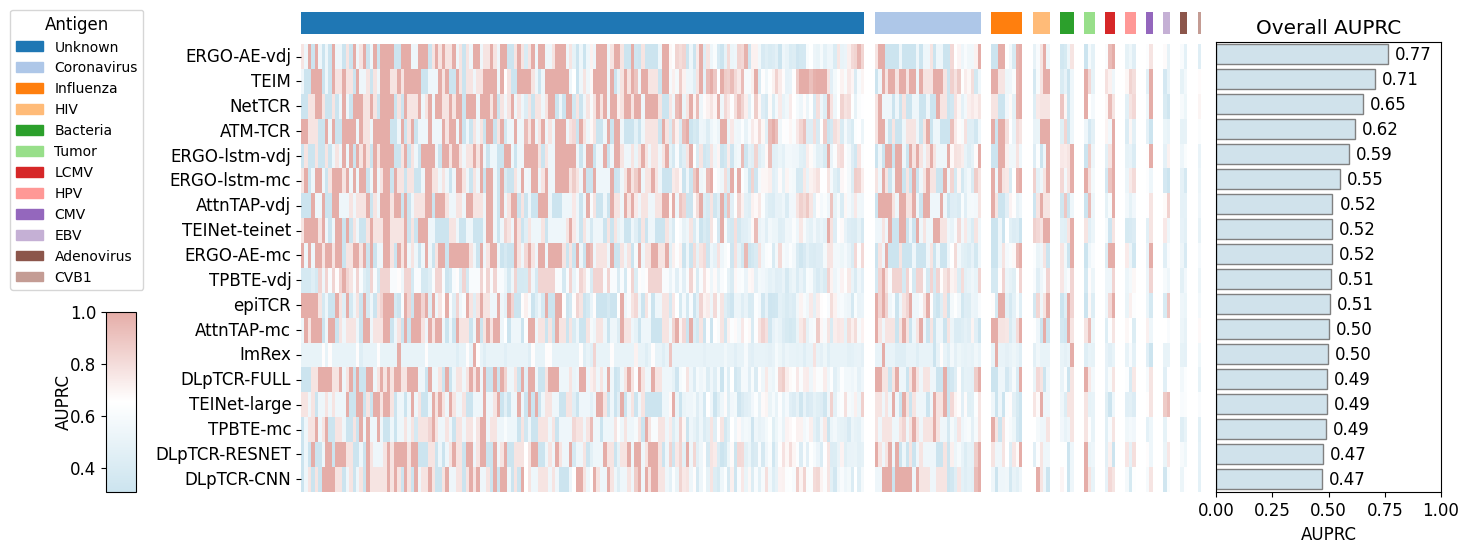

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec
from scipy.cluster.hierarchy import linkage, leaves_list
epitope_counts = data.groupby('antigen_species')['epitope'].nunique()
antigen_unique = data.drop_duplicates(subset=['epitope', 'antigen_species'])
data['antigen_species'].value_counts()
merged_with_species = pd.merge(merged_df.T, antigen_unique, on='epitope').set_index('epitope').T
new_columns = merged_with_species.iloc[-1]
merged_with_species = merged_with_species.iloc[:-1, :]
merged_with_species.columns = new_columns
column_counts = merged_with_species.columns.value_counts()
sorted_columns = column_counts.index.tolist()
sorted_df = pd.DataFrame()
for col in sorted_columns:
    cols_to_group = merged_with_species.loc[:, merged_with_species.columns == col]
    sorted_df = pd.concat([sorted_df, cols_to_group], axis=1)
merged_with_species=sorted_df
merged_with_species

column_counts = merged_with_species.columns.value_counts()
sorted_columns = column_counts.index.tolist()
sorted_df = pd.DataFrame()

for col in sorted_columns:
    cols_to_group = merged_with_species.loc[:, merged_with_species.columns == col]
    sorted_df = pd.concat([sorted_df, cols_to_group], axis=1)

merged_with_species = sorted_df
unique_columns = merged_with_species.columns.unique()
df_rearranged = pd.DataFrame()

for col in unique_columns:
    cols_to_group = merged_with_species.loc[:, merged_with_species.columns == col]
    if cols_to_group.dropna(axis=1, how='all').shape[1] > 1:
        linkage_matrix = linkage(cols_to_group.T.dropna(), method='single')
        order = leaves_list(linkage_matrix)
        clustered_cols = cols_to_group.iloc[:, order]
    else:
        clustered_cols = cols_to_group

    df_rearranged = pd.concat([df_rearranged, clustered_cols], axis=1)
    num_gaps = 3
    for _ in range(num_gaps):
        df_rearranged = pd.concat([df_rearranged, pd.DataFrame(np.nan, index=cols_to_group.index, columns=[f'gap_{col}'])], axis=1)

df_rearranged = df_rearranged.iloc[:, :-num_gaps]

column_counts = merged_with_species.columns.value_counts()
sorted_columns = column_counts.index.tolist()
sorted_df = pd.DataFrame()

for col in sorted_columns:
    cols_to_group = merged_with_species.loc[:, merged_with_species.columns == col]
    sorted_df = pd.concat([sorted_df, cols_to_group], axis=1)

merged_with_species = sorted_df
unique_columns = merged_with_species.columns.unique()
df_rearranged = pd.DataFrame()

for col in unique_columns:
    cols_to_group = merged_with_species.loc[:, merged_with_species.columns == col]
    if cols_to_group.dropna(axis=1, how='all').shape[1] > 1:
        linkage_matrix = linkage(cols_to_group.T.dropna(), method='single')
        order = leaves_list(linkage_matrix)
        clustered_cols = cols_to_group.iloc[:, order]
    else:
        clustered_cols = cols_to_group

    df_rearranged = pd.concat([df_rearranged, clustered_cols], axis=1)
    num_gaps = 3
    for _ in range(num_gaps):
        df_rearranged = pd.concat([df_rearranged, pd.DataFrame(np.nan, index=cols_to_group.index, columns=[f'gap_{col}'])], axis=1)

df_rearranged = df_rearranged.iloc[:, :-num_gaps]

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 12})
color_palette = sns.color_palette("tab20", len(unique_columns))
col_colors = []

for col in df_rearranged.columns:
    if not col.startswith('gap'):
        col_colors.append(color_palette[list(unique_columns).index(col)])
    else:
        col_colors.append((1.0, 1.0, 1.0)) 

fig = plt.figure(figsize=(15, 6)) 
ax_heatmap = fig.add_axes([0.1, 0.1, 0.6, 0.8]) 
colors = ["#CCE4EF", "white", "#E5ADA8"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
sns.heatmap(
    df_rearranged.astype(float), 
    cmap=cmap, 
    cbar=False, 
    ax=ax_heatmap, 
    xticklabels=False)

divider = make_axes_locatable(ax_heatmap)
cax_above = divider.append_axes("top", size="5%", pad=0.1) 
cax = fig.add_axes([-0.03, 0.1, 0.02, 0.3])  # 

colorbar = fig.colorbar(ax_heatmap.collections[0], cax=cax, orientation='vertical')
cax.yaxis.set_ticks_position('left')
cax.yaxis.set_label_position('left')
cax.set_ylabel('AUPRC', va='center') 
cax_above.imshow([col_colors], aspect='auto', interpolation='nearest')
cax_above.axis('off')

handles = [Patch(color=color_palette[i], label=unique_columns[i]) for i in range(len(unique_columns))]
plt.legend(
    handles=handles, 
    loc='center left', 
    bbox_to_anchor=(-3.2, 1.9), 
    borderaxespad=0., fontsize=10, labelspacing=0.5, ncol=1, title="Antigen")

ax_barplot = fig.add_axes([0.71, 0.1, 0.15, 0.75])  
bar_plot = sns.barplot(
    x='AUPRC', y=df_mean.index, data=df_mean, 
    palette=["#CCE4EF"], edgecolor='gray', ax=ax_barplot
)
ax_barplot.set_title('Overall AUPRC')
ax_barplot.set_ylabel('')
ax_barplot.set_yticklabels([])
ax_barplot.tick_params(axis='y', which='both', length=0)
ax_barplot.set_xlim(0, 1)

for p in bar_plot.patches:
    ax_barplot.annotate(
        f"{p.get_width():.2f}",
        (p.get_width(), p.get_y() + p.get_height() / 2),
        textcoords="offset points",  
        xytext=(5, 0), ha='left', va='center')

path = "./All_results/fig/fig2/"
plt.savefig(path + 'F_unseen_prediction.pdf', bbox_inches='tight')
plt.show()
